## Keras Datasets

In [ ]:
from keras import datasets
import matplotlib.pyplot as plt

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [11]:
type(train_labels)

numpy.ndarray

In [12]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


In [13]:
train_images_vector = train_images.reshape(60000, 784)
train_images_vector.shape

(60000, 784)

In [14]:
train_images_vector = train_images_vector.astype('float32')
train_images_vector.dtype

dtype('float32')

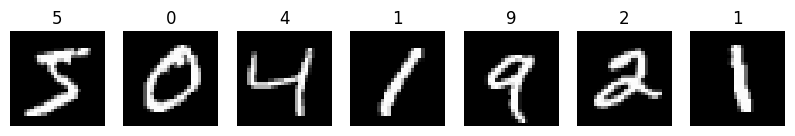

In [15]:
fig, axes = plt.subplots(1, 7, figsize=(10, 5))
for i in range(len(axes)):
  axes[i].imshow(train_images[i], cmap='gray')
  axes[i].set_title(train_labels[i])
  axes[i].set_axis_off()

## Tensorflow Datasets

In [16]:
import tensorflow_datasets as tfds
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [ ]:
ds, info = tfds.load('mnist', split=['train', 'test'], with_info=True)

In [ ]:
type(ds[0])

In [ ]:
isinstance(ds[1], tf.data.Dataset)

In [ ]:
print(len(ds[1]))
print(ds[1].element_spec)

In [ ]:
sample = ds[0].take(1)
for item in sample:
  print(type(item['image']))
  print(item.keys())
  print(item['image'].shape)
  print(tf.shape(item['image']))
  print(item['label'])

In [ ]:
type(tfds.as_numpy(item['image']))

In [ ]:
tfds.show_examples(ds[0], info)

### Prepare tfds for Train

In [ ]:
train_dataset, test_dataset = tfds.load('mnist', split=['train', 'test'],
                                        as_supervised=True)

In [ ]:
def preprocess_data(images, labels):
    images = tf.reshape(images, (len(images), 784,))
    inputs = {"images": images, "labels": labels}
    outputs = inputs
    return outputs['images'], outputs['labels']

In [ ]:
train_dataset2 = train_dataset.batch(128).map(
    lambda x, y: preprocess_data(x, y),
        num_parallel_calls=tf.data.AUTOTUNE).prefetch(
            tf.data.AUTOTUNE)
test_dataset2 = test_dataset.batch(128).map(
    preprocess_data, num_parallel_calls=tf.data.AUTOTUNE).prefetch(
        tf.data.AUTOTUNE)

In [ ]:
sample1 = train_dataset2.take(1)

for image, label in sample1:
  print(image.shape)
  print(label)

## Model Design

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
    ])

## Training

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### Train with Keras Dataset

In [ ]:
model.fit(train_images_vector, train_labels, epochs=5, batch_size=128)

### Train with TensorFlow Dataset

In [ ]:
model.fit(train_dataset2, epochs=5, batch_size=128)